 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, parse_dates =True, infer_datetime_format = True).sort_index(ascending = False)
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, parse_dates = True, infer_datetime_format = True).sort_index(ascending = False)
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, parse_dates = True, infer_datetime_format = True).sort_index(ascending = False)
sp500_history.head()

,Date,Close
1648,1-Oct-12,$1444.49
1647,2-Oct-12,$1445.75
1646,3-Oct-12,$1450.99
1645,4-Oct-12,$1461.40
1644,5-Oct-12,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '', regex=True)
sp500_history

,Date,Close
1648,1-Oct-12,1444.49
1647,2-Oct-12,1445.75
1646,3-Oct-12,1450.99
1645,4-Oct-12,1461.40
1644,5-Oct-12,1460.93
...,...,...
4,16-Apr-19,2907.06
3,17-Apr-19,2900.45
2,18-Apr-19,2905.03
1,22-Apr-19,2907.97


In [11]:
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.head()

,Date,Close
1648,1-Oct-12,1444.49
1647,2-Oct-12,1445.75
1646,3-Oct-12,1450.99
1645,4-Oct-12,1461.40
1644,5-Oct-12,1460.93


In [12]:
# Calculate Daily Returns
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.isnull()

,Close
Date,
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
2012-10-08,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['SP500']
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = 'columns', join = 'inner')
portfolio_df.sort_index(inplace=True)
portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

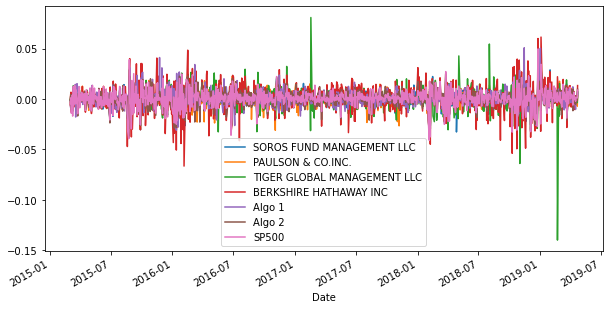

In [17]:
# Plot daily returns of all portfolios
portfolio_df.plot(figsize = (10 , 5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

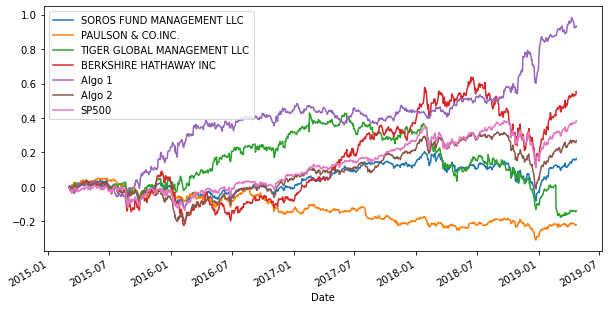

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_df).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize = (10, 5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

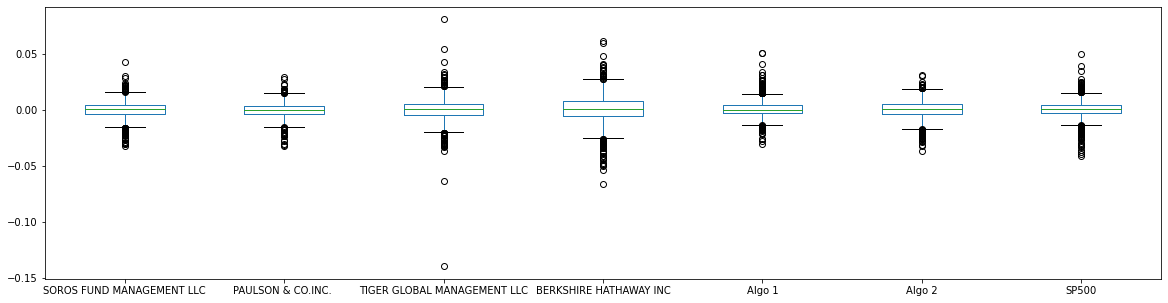

In [19]:
# Box plot to visually show risk
portfolio_df.plot(kind = 'box', figsize = (20, 5))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = portfolio_df.std().loc['SP500']
sp500_std
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = portfolio_std[portfolio_std > sp500_std]
riskier_portfolios

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

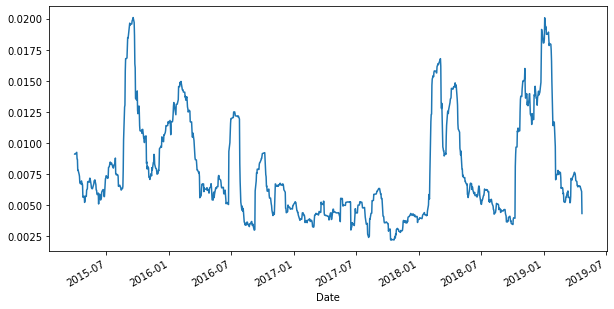

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21day_std = portfolio_df['SP500'].rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_21day_std.plot(figsize = (10, 5))

### Calculate and plot the correlation

<AxesSubplot:xlabel='SP500', ylabel='Algo 2'>

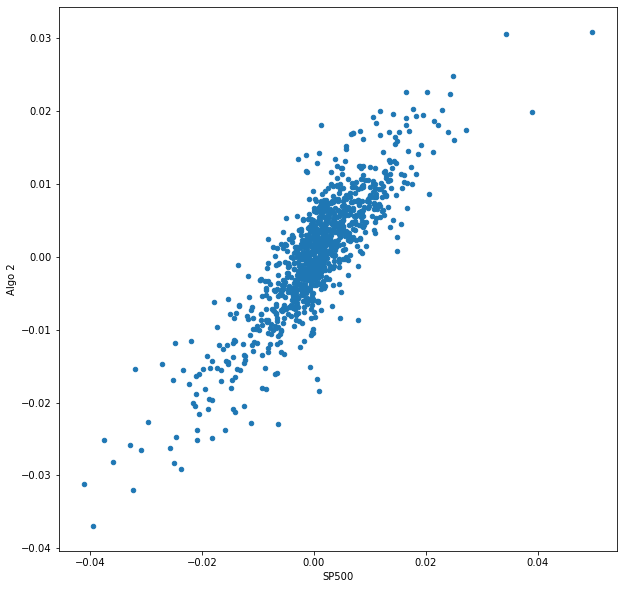

In [24]:
# Calculate the correlation
correlation = portfolio_df.corr()
correlation
# Display de correlation matrix
portfolio_df.plot(kind = 'scatter', x = 'SP500', y = 'Algo 2', figsize = (10, 10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

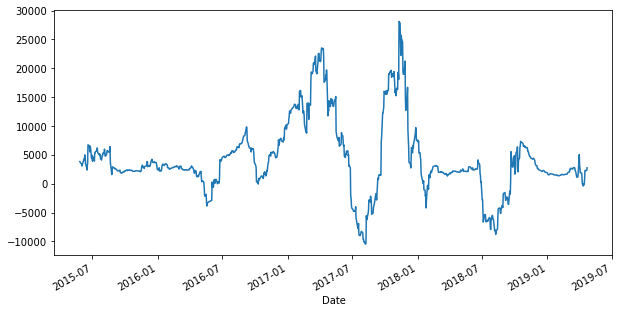

In [25]:
# Calculate covariance of a single portfolio
rolling_cov_algo1 = portfolio_df['Algo 1'].rolling(window = 60).corr(portfolio_df['SP500'])
# Calculate variance of S&P 500
rolling_var_sp500 = portfolio_df['SP500'].rolling(window = 60).var()
# Computing beta
beta = rolling_cov_algo1/rolling_var_sp500
# Plot beta trend
beta.plot(figsize = (10, 5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

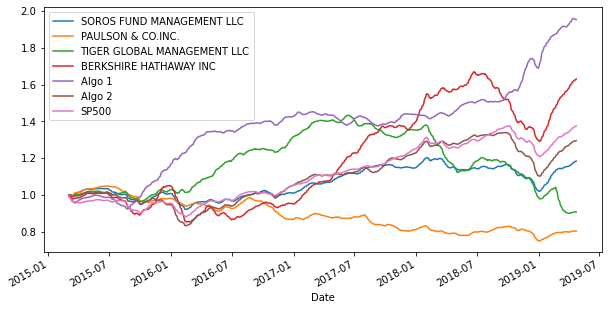

In [26]:
# Use `ewm` to calculate the rolling window
portfolio_df_ewm = portfolio_df.ewm(span = 21).mean()
(1+portfolio_df_ewm).cumprod().plot(figsize = (10, 5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharp_ratios = (portfolio_df.mean() * 252) / (portfolio_std * np.sqrt(252))
sharp_ratios.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

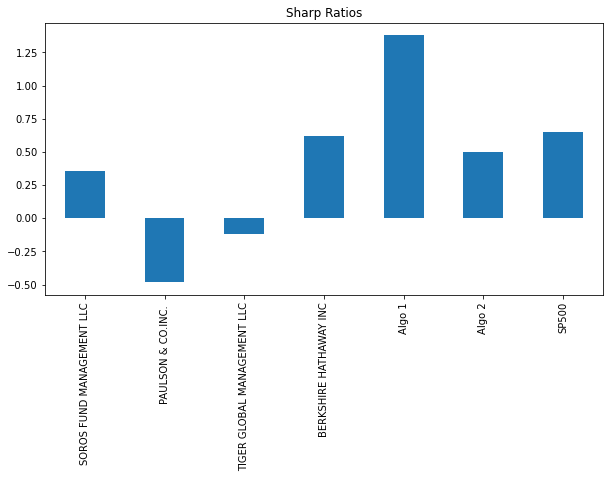

In [28]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios.plot.bar(title = 'Sharp Ratios', figsize = (10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed all others, while Algo 2 fell behind Algo 1, BHI and SP500 but outperformed the rest. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
goog_historical_path = Path("../Starter_Code/Resources/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
goog_historical.rename(columns = {'NOCP' : 'GOOG'}, inplace = True)
goog_historical.drop(columns = 'Symbol', inplace = True)
goog_historical.head()


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [30]:
# Reading data from 2nd stock
aapl_historical_path = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
aapl_historical.rename(columns = {'NOCP' : 'AAPL'}, inplace = True)
aapl_historical.drop(columns = 'Symbol', inplace = True)
aapl_historical.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [31]:
# Reading data from 3rd stock
cost_historical_path = Path("../Starter_Code/Resources/cost_historical.csv")
cost_historical = pd.read_csv(cost_historical_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
cost_historical.rename(columns = {'NOCP' : 'COST'}, inplace = True)
cost_historical.drop(columns = 'Symbol', inplace = True)
cost_historical.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [32]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat((goog_historical, aapl_historical, cost_historical), axis = 'columns', join = 'inner')
combined_df

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


## Reset Date index 
DONE IN PREVIOUS STEPS


## Reorganize portfolio data by having a column per symbol 
DONE IN PREVIOUS STEPS


In [35]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.head()


,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns.dot(weights)
# Display sample data
portfolio_return.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat((portfolio_return, portfolio_df), axis = 'columns', join = 'inner')
all_portfolio_returns.rename(columns = {0 : 'Portfolio'}, inplace = True)
all_portfolio_returns

,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace = True)
all_portfolio_returns

,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
daily_returns_asd = daily_returns.std() * np.sqrt(252)
daily_returns_asd

GOOG    0.265322
AAPL    0.300387
COST    0.213344
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

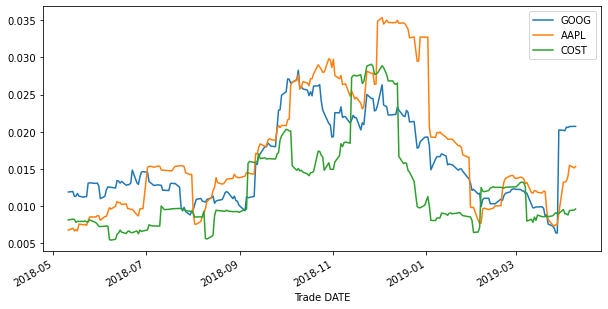

In [40]:
# Calculate rolling standard deviation
daily_returns_rolling = daily_returns.rolling(window = 21).std()
# Plot rolling standard deviation
daily_returns_rolling.plot(figsize = (10 , 5))

### Calculate and plot the correlation

<AxesSubplot:>

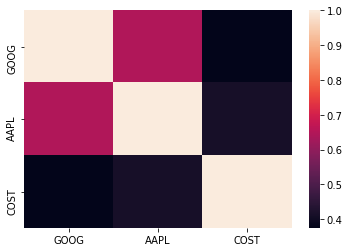

In [41]:
# Calculate and plot the correlation
daily_returns_corr = daily_returns.corr()
sns.heatmap(daily_returns_corr)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

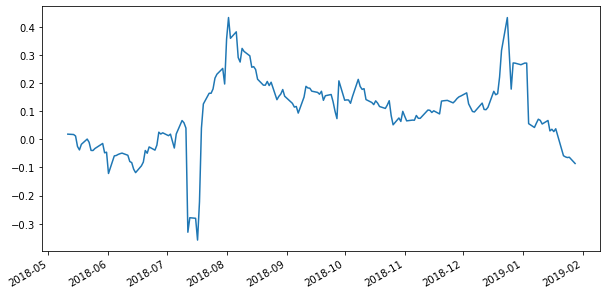

In [42]:
# Calculate and plot Beta
portfolio_cov = all_portfolio_returns['Portfolio'].rolling(window = 60).cov(all_portfolio_returns['SP500'])
portfolio_var = all_portfolio_returns['SP500'].rolling(window = 60).var()
portfolio_beta = portfolio_cov/portfolio_var
portfolio_beta.plot(figsize = (10, 5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualzied Sharpe Ratios
all_portfolio_returns_sharpe = (all_portfolio_returns.mean()* 252)/(all_portfolio_returns.std() * np.sqrt(252))
all_portfolio_returns_sharpe

Portfolio                     -0.614330
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
SP500                          0.595486
dtype: float64

<AxesSubplot:>

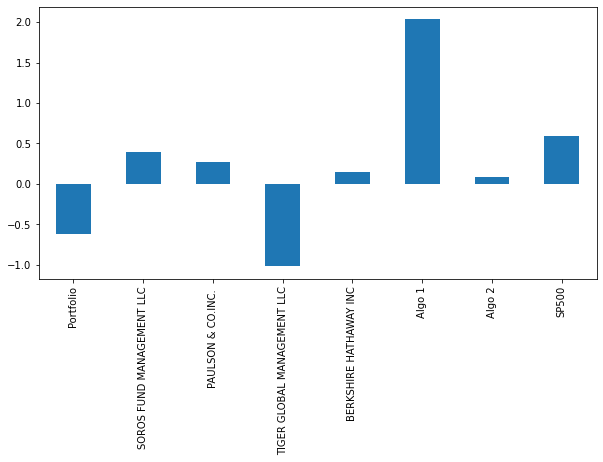

In [44]:
# Visualize the sharpe ratios as a bar plot
all_portfolio_returns_sharpe.plot.bar(figsize = (10,5))

### How does your portfolio do?

Write your answer here!

## It was a poor investment, only better than Tiger Global Management LLC. 